In [1]:
import matplotlib.pyplot as plt

In [2]:
"""Generate images using pretrained network pickle."""

import argparse
import os
import pickle
import re

import numpy as np
import PIL.Image

import dnnlib
import dnnlib.tflib as tflib

In [3]:

def generate_images(network_pkl, seeds, truncation_psi, outdir, class_idx, dlatents_npz):
    tflib.init_tf()
    print('Loading networks from "%s"...' % network_pkl)
    with dnnlib.util.open_url(network_pkl) as fp:
        _G, _D, Gs = pickle.load(fp)

    os.makedirs(outdir, exist_ok=True)

    # Render images for a given dlatent vector.
    if dlatents_npz is not None:
        print(f'Generating images from dlatents file "{dlatents_npz}"')
        dlatents = np.load(dlatents_npz)['dlatents']
        assert dlatents.shape[1:] == (18, 512) # [N, 18, 512]
        imgs = Gs.components.synthesis.run(dlatents, output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True))
        for i, img in enumerate(imgs):
            fname = f'{outdir}/dlatent{i:02d}.png'
            print (f'Saved {fname}')
            PIL.Image.fromarray(img, 'RGB').save(fname)
        return img

    # Render images for dlatents initialized from random seeds.
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True),
        'randomize_noise': False
    }
    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
    label = np.zeros([1] + Gs.input_shapes[1][1:])
    if class_idx is not None:
        label[:, class_idx] = 1
    image_back = []
    for seed_idx, seed in enumerate(seeds):
        print('Generating image for seed %d (%d/%d) ...' % (seed, seed_idx, len(seeds)))
        rnd = np.random.RandomState(seed)
        z = rnd.randn(1, *Gs.input_shape[1:]) # [minibatch, component]
        tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]
        images = Gs.run(z, label, **Gs_kwargs) # [minibatch, height, width, channel]
        image_back.append(images[0])
        PIL.Image.fromarray(images[0], 'RGB').save(f'{outdir}/seed{seed:04d}.png')
    return image_back
#----------------------------------------------------------------------------

def _parse_num_range(s):
    '''Accept either a comma separated list of numbers 'a,b,c' or a range 'a-c' and return as a list of ints.'''

    range_re = re.compile(r'^(\d+)-(\d+)$')
    m = range_re.match(s)
    if m:
        return list(range(int(m.group(1)), int(m.group(2))+1))
    vals = s.split(',')
    return [int(x) for x in vals]

In [4]:
!pwd

/workspace/github/stylegan2-ada


In [4]:
#network_pkl, seeds, truncation_psi, outdir, class_idx, dlatents_npz
network_pkl = '/workspace/Downloads/network-snapshot-000040.pkl'

tflib.init_tf()
print('Loading networks from "%s"...' % network_pkl)
with dnnlib.util.open_url(network_pkl) as fp:
    _G, _D, Gs = pickle.load(fp)

Loading networks from "/workspace/Downloads/network-snapshot-000040.pkl"...


In [ ]:
x = generate_images(network_pkl, seeds=[2,20,200], truncation_psi=.1, outdir='./fff', class_idx=None, dlatents_npz=None)

In [ ]:
x[0].shape

In [ ]:
plt.imshow(x[0])

In [ ]:
# BATCH SIZE lesson

"""
we have an array with 4 dimensions: (batch_size, height, width, channels)

we have an array with 3 dimensions of a single image: (height,width,channels)

How do you add this image to the 4 dimensional array with a batch_size

"""

stack_images = np.stack((x[0],x[1]))
print(stack_images.shape)

to_add = np.expand_dims(x[2],axis=0)
print(to_add.shape)

print(np.concatenate((stack_images,to_add)).shape)

In [ ]:
np.expand_dims(x[2],axis=0).shape

In [ ]:
to_add = np.expand_dims(x[2],axis=0)
print(to_add.shape)

In [ ]:
np.concatenate((stack_images,to_add)).shape

In [ ]:
x = generate_images(network_pkl, seeds=[], truncation_psi=.1, outdir='./fff', class_idx=None, dlatents_npz=None)

In [ ]:
def generate_images(network_pkl):
    tflib.init_tf()
    
    print('Loading networks from "%s"...' % network_pkl)
    with dnnlib.util.open_url(network_pkl) as fp:
        _G, _D, Gs = pickle.load(fp)
    
    # a dictionary to keep all the paramters straight (in one spot)
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True),
        'randomize_noise': False
    }
    label = np.zeros([1] + Gs.input_shapes[1][1:])
    noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
    seed = 1
    rnd = np.random.RandomState(seed)
    z = rnd.randn(1, *Gs.input_shape[1:])
    tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]
    images = Gs.run(z, label, **Gs_kwargs) # [minibatch, height, width, channel]
    
    return images
    
    

In [ ]:
plt.imshow(generate_images(network_pkl)[0])

In [ ]:
plt.imshow(generate_images(network_pkl)[0])

In [ ]:
plt.imshow(generate_images(network_pkl)[0])

In [ ]:
tflib.init_tf()


In [ ]:

print('Loading networks from "%s"...' % network_pkl)
with dnnlib.util.open_url(network_pkl) as fp:
    _G, _D, Gs = pickle.load(fp)


In [ ]:

# a dictionary to keep all the paramters straight (in one spot)
Gs_kwargs = {
    'output_transform': dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True),
    'randomize_noise': False
}

In [ ]:
label = np.zeros([1] + Gs.input_shapes[1][1:])
noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
seed = 1

In [ ]:
noise_vars

In [ ]:
tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]


In [ ]:


rnd = np.random.RandomState(seed)
z = rnd.randn(1, *Gs.input_shape[1:])
tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]
images = Gs.run(z, label, **Gs_kwargs) # [minibatch, height, width, channel]

In [ ]:
plt.imshow(images[0])

In [ ]:
#

# https://amarsaini.github.io/Epoching-Blog/jupyter/2020/08/10/Latent-Space-Exploration-with-StyleGAN2.html

In [ ]:
!git clone https://github.com/AmarSaini/Epoching_StyleGan2_Setup.git

In [ ]:
os.chdir('./Epoching_StyleGan2_Setup/')

In [ ]:
!pwd

In [ ]:

!pip install dlib

In [ ]:
!pip install ipywidgets

In [13]:
#collapse-hide
import sys
#
#from stylegan2 import pretrained_networks
from stylegan2 import dnnlib
from stylegan2.dnnlib import tflib

from pathlib import Path
from PIL import Image
import pickle
import numpy as np

import ipywidgets as widgets
from tqdm import tqdm
import matplotlib.pyplot as plt
model_path  = '/workspace/Downloads/network-snapshot-000040.pkl'

fps = 20
results_size = 400

In [ ]:
with dnnlib.util.open_url(network_pkl) as fp:
    _G, _D, Gs = pickle.load(fp)

In [5]:
def load_model():
    
    #network_pkl, seeds, truncation_psi, outdir, class_idx, dlatents_npz
    network_pkl = '/workspace/Downloads/network-snapshot-000040.pkl'

    tflib.init_tf()
    print('Loading networks from "%s"...' % network_pkl)
    with dnnlib.util.open_url(network_pkl) as fp:
        _G, _D, Gs = pickle.load(fp)
    
    noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
    
    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    
    return Gs, noise_vars, Gs_kwargs

In [6]:
load_model()

Loading networks from "/workspace/Downloads/network-snapshot-000040.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.


(<dnnlib.tflib.network.Network at 0x7fcb746f7940>,
 [<tf.Variable 'G_synthesis_3/noise0:0' shape=(1, 1, 4, 4) dtype=float32_ref>,
  <tf.Variable 'G_synthesis_3/noise1:0' shape=(1, 1, 8, 8) dtype=float32_ref>,
  <tf.Variable 'G_synthesis_3/noise2:0' shape=(1, 1, 8, 8) dtype=float32_ref>,
  <tf.Variable 'G_synthesis_3/noise3:0' shape=(1, 1, 16, 16) dtype=float32_ref>,
  <tf.Variable 'G_synthesis_3/noise4:0' shape=(1, 1, 16, 16) dtype=float32_ref>,
  <tf.Variable 'G_synthesis_3/noise5:0' shape=(1, 1, 32, 32) dtype=float32_ref>,
  <tf.Variable 'G_synthesis_3/noise6:0' shape=(1, 1, 32, 32) dtype=float32_ref>,
  <tf.Variable 'G_synthesis_3/noise7:0' shape=(1, 1, 64, 64) dtype=float32_ref>,
  <tf.Variable 'G_synthesis_3/noise8:0' shape=(1, 1, 64, 64) dtype=float32_ref>,
  <tf.Variable 'G_synthesis_3/noise9:0' shape=(1, 1, 128, 128) dtype=float32_ref>,
  <tf.Variable 'G_synthesis_3/noise10:0' shape=(1, 1, 128, 128) dtype=float32_ref>,
  <tf.Variable 'G_synthesis_3/noise11:0' shape=(1, 1, 256, 

In [7]:
# Generate images given a random seed (Integer)
def generate_image_random(rand_seed):
    rnd = np.random.RandomState(rand_seed)
    z = rnd.randn(1, *Gs.input_shape[1:])
    tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars})
    images = Gs.run(z, None, **Gs_kwargs)
    return images, z

In [8]:
# Generate images given a latent code ( vector of size [1, 512] )
def generate_image_from_z(z):
    images = Gs.run(z, None, **Gs_kwargs)
    return images

In [11]:
Gs, noise_vars, Gs_kwargs = load_model()

Loading networks from "/workspace/Downloads/network-snapshot-000040.pkl"...


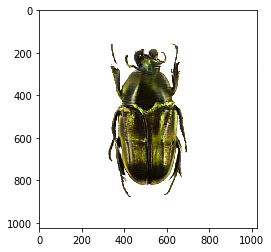

In [37]:
images, latent_code1 = generate_image_random(42)
#image1 = Image.fromarray(images[0]).resize((results_size, results_size))
latent_code1.shape
plt.imshow(images[0])
plt.show()

In [35]:
# Ask the generator to make an output, given a random seed number: 1234
images, latent_code2 = generate_image_random(1234)
image2 = Image.fromarray(images[0]).resize((results_size, results_size))
latent_code2.shape

(1, 512)

In [16]:
latent_code1[0][:5], latent_code2[0][:5]

(array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337]),
 array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873]))

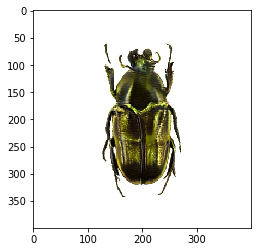

In [19]:
plt.imshow(image1)

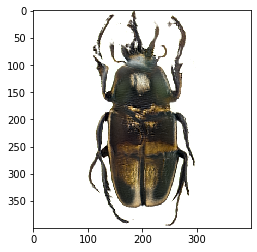

In [20]:
plt.imshow(image2)

In [38]:
def linear_interpolate(code1, code2, alpha):
    return code1 * alpha + code2 * (1 - alpha)

In [39]:
interpolated_latent_code = linear_interpolate(latent_code1, latent_code2, 0.5)
interpolated_latent_code.shape

(1, 512)

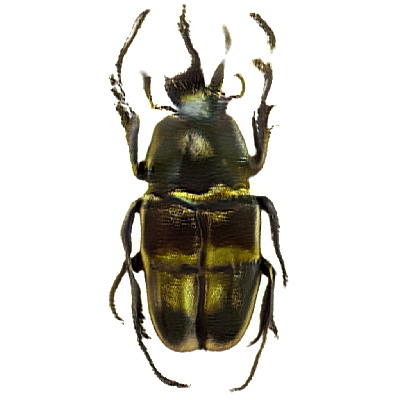

In [40]:
images = generate_image_from_z(interpolated_latent_code)
Image.fromarray(images[0]).resize((results_size, results_size))

In [41]:
#collapse-hide
output_gifs_path = Path('output_gifs')
# Make Output Gifs folder if it doesn't exist.
if not output_gifs_path.exists():
    output_gifs_path.mkdir()

In [42]:
#collapse-hide
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def make_latent_interp_animation(code1, code2, img1, img2, num_interps):
    
    step_size = 1.0/num_interps
    
    all_imgs = []
    
    amounts = np.arange(0, 1, step_size)
    
    for alpha in tqdm(amounts):
        interpolated_latent_code = linear_interpolate(code1, code2, alpha)
        images = generate_image_from_z(interpolated_latent_code)
        interp_latent_image = Image.fromarray(images[0]).resize((400, 400))
        frame = get_concat_h(img1, interp_latent_image)
        frame = get_concat_h(frame, img2)
        all_imgs.append(frame)

    save_name = output_gifs_path/'latent_space_traversal.gif'
    all_imgs[0].save(save_name, save_all=True, append_images=all_imgs[1:], duration=1000/fps, loop=0)

In [43]:
make_latent_interp_animation(latent_code1, latent_code2, image1, image2, num_interps=200)

100%|██████████| 200/200 [00:12<00:00, 16.60it/s]


In [47]:
!$model_path

/bin/dash: 1: /workspace/Downloads/network-snapshot-000040.pkl: Permission denied


In [ ]:
!python -W ignore stylegan2/dataset_tool.py create_from_images datasets_stylegan2/custom_imgs aligned_imgs/

In [51]:
!python -W ignore stylegan2/epoching_custom_run_projector.py project-real-images --network=$model_path \
  --dataset='./imgs/' --data-dir=datasets_stylegan2 --num-images=2 --num-snapshots 500

Local submit - run_dir: results/00004-project-real-images
dnnlib: Running run_projector.project_real_images() on localhost...
Loading networks from "/workspace/Downloads/network-snapshot-000040.pkl"...
Traceback (most recent call last):
  File "stylegan2/epoching_custom_run_projector.py", line 154, in <module>
    main()
  File "stylegan2/epoching_custom_run_projector.py", line 149, in main
    dnnlib.submit_run(sc, func_name_map[subcmd], **kwargs)
  File "/workspace/github/stylegan2-ada/stylegan2/dnnlib/submission/submit.py", line 343, in submit_run
    return farm.submit(submit_config, host_run_dir)
  File "/workspace/github/stylegan2-ada/stylegan2/dnnlib/submission/internal/local.py", line 22, in submit
    return run_wrapper(submit_config)
  File "/workspace/github/stylegan2-ada/stylegan2/dnnlib/submission/submit.py", line 280, in run_wrapper
    run_func_obj(**submit_config.run_func_kwargs)
  File "/workspace/github/stylegan2-ada/stylegan2/run_projector.py", line 65, in project_re